In [90]:
from docx import Document
import pandas as pd
import os
from tqdm import tqdm

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [72]:
import os

# Base directory
base_dir = '../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/'

# Lists to hold .docx file paths
year_folder_files = []
subfolder_files = []

# Walking through the directory
for dirpath, dirnames, filenames in os.walk(base_dir):
    # Calculate depth of current directory
    depth = len(os.path.normpath(os.path.relpath(dirpath, base_dir)).split(os.path.sep))

    # Filtering and adding .docx files to the appropriate list
    for file in filenames:
        if file.endswith('.docx'):
            full_path = os.path.join(dirpath, file)
            if depth == 1:
                year_folder_files.append(full_path)
            elif depth > 1:
                subfolder_files.append(full_path)



In [74]:
# Printing the lists of .docx files
print("Files in Year Folders:")
for file in year_folder_files:
    print(file)



Files in Year Folders:
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2016/2016 MIXED and single defendant cases.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2016/2016 single defendant cases.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/2019 Appeal Court Judgments - Single cases.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/2019 Appeal Court Judgments - MIXED and single defendant cases.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2018/Criminal Appeal Court Cases for 2018 - MIXED and Single defendant cases.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2018/Criminal Appeal Court Cases for 2018 - Single defendant cases.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2011/2011 Single defendant case.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2017/2017 MIXED and single defendant cases.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2017/2017 single defen

In [75]:
print("\nFiles in Subfolders:")
for file in subfolder_files:
    print(file)


Files in Subfolders:
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2016/JULY 2016/Oliver JULY 2016.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2016/JAN 2016/Ogden JAN 2016.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/MARCH 2019/Beale MARCH 2019.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/MARCH 2019/Diamond MARCH 2019.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/MARCH 2019/Harper MARCH 2019.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/MARCH 2019/Ayres MARCH 2019.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/MARCH 2019/Baines MARCH 2019.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/MARCH 2019/Faltec MARCH 2019.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/JULY 2019/Dixon JULY 2019.docx
../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/JULY 2019/R Brown JULY 2019.docx
../Appeal Court Judgments/APPEAL COURT J

In [101]:
for each_year in tqdm(year_folder_files):
    extracted_list = []
    document = Document(each_year)
    for para in document.paragraphs:
        para_list = [x for x in para.text.split('\t') if x]
        if len(para_list)==3:
            extracted_list.append(para_list)
    
df = pd.DataFrame(extracted_list, columns = ['Case', 'Keywords', 'Outcome'])      

100%|███████████████████████████████████████████| 14/14 [00:00<00:00, 51.99it/s]


In [102]:
df

,Case,Keywords,Outcome
0,"Bell, R. v [2010] EWCA Crim 3 (19 January 2010)","Forensic, Expert, DNA",Dismissed
1,"Jabar, R. v [2010] EWCA Crim 130 (26 January 2...","Forensic, Expert",Granted
2,"Mackay, R. v [2010] EWCA Crim 167 (21 January ...",DNA,Dismissed
3,R v B [2010] EWCA Crim 4 (21 January 2010),"Forensic, Expert",Dismissed
4,"Sabi, R. v [2010] EWCA Crim 180 (19 January 2010)","Forensic, expert, DNA",Dismissed
5,RCPO v C [2010] EWCA Crim 97 (05 February 2010),Expert,Refused
6,"Broughton, R. v [2010] EWCA Crim 549 (24 March...","Forensic, expert, DNA",Refused
7,"Naish, R. v [2010] EWCA Crim 1005 (23 March 2010)",DNA,Granted
8,"Osborne, R v [2010] EWCA Crim 547 (24 March 20...","Forensic, expert",Dismissed
9,"Weller, R. v [2010] EWCA Crim 1085 (04 March 2...","Forensic, Expert, DNA",Dismissed


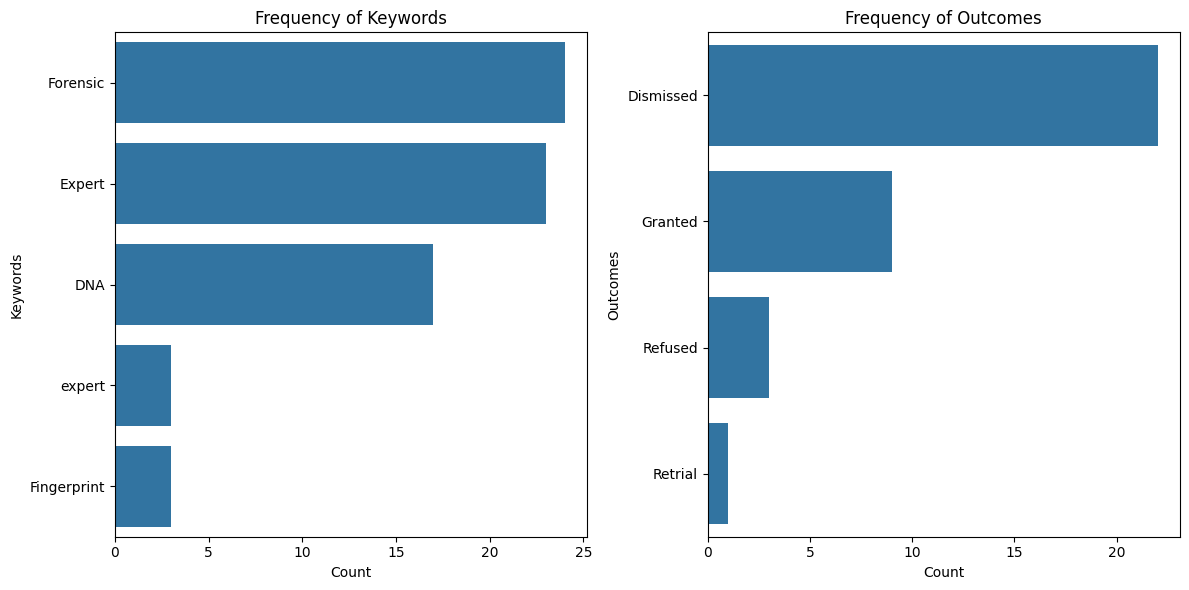

In [103]:
keywords_series = df['Keywords'].str.split(', ').apply(pd.Series).stack()
keywords_count = keywords_series.value_counts()

# Outcome count
outcome_count = df['Outcome'].value_counts()

# Plotting the data
plt.figure(figsize=(12, 6))

# Bar chart for Keywords
plt.subplot(1, 2, 1)
sns.barplot(x=keywords_count.values, y=keywords_count.index)
plt.title('Frequency of Keywords')
plt.xlabel('Count')
plt.ylabel('Keywords')

# Bar chart for Outcomes
plt.subplot(1, 2, 2)
sns.barplot(x=outcome_count.values, y=outcome_count.index)
plt.title('Frequency of Outcomes')
plt.xlabel('Count')
plt.ylabel('Outcomes')

plt.tight_layout()
plt.show()

In [105]:
# Calculating the percentages for keywords and outcomes

# Total counts for keywords and outcomes
total_keywords = keywords_count.sum()
total_outcomes = outcome_count.sum()

# Calculating percentages
keywords_percentage = (keywords_count / total_keywords) * 100
outcomes_percentage = (outcome_count / total_outcomes) * 100

# Creating DataFrames for better display
keywords_percentage_df = keywords_percentage.reset_index()
keywords_percentage_df.columns = ['Keyword', 'Percentage']

outcomes_percentage_df = outcomes_percentage.reset_index()
outcomes_percentage_df.columns = ['Outcome', 'Percentage']


In [106]:
keywords_percentage_df

,Keyword,Percentage
0,Forensic,34.285714
1,Expert,32.857143
2,DNA,24.285714
3,expert,4.285714
4,Fingerprint,4.285714


In [107]:
outcomes_percentage_df

,Outcome,Percentage
0,Dismissed,62.857143
1,Granted,25.714286
2,Refused,8.571429
3,Retrial,2.857143


In [145]:
import re

# def has_serial_number(cell_text):
#     return bool(re.match(r'^\d+\.', cell_text))

def has_serial_number_or_notes(cell_text):
    return bool(re.match(r'^(\d+\.)|NOTES', cell_text))

In [168]:
len(subfolder_files)

149

In [179]:
import pandas as pd
from tqdm import tqdm
from docx import Document

# Assuming 'subfolder_files' is a list of file paths
all_data_frames = []
mismatched_data_frames =[]
mismatched_files = []

count = 0

for each_file in tqdm(subfolder_files):
    document = Document(each_file)
    document = Document(each_file)
    tables = []

    for table in document.tables:
        df_table = [[cell.text for cell in row.cells] for row in table.rows]

        # Filter and add rows with serial numbers or "NOTES"
        for row in df_table:
            if row and has_serial_number_or_notes(row[0]):
                tables.append(row)

    # Create a DataFrame for this file
    if count == 0:
        df_ = pd.DataFrame(tables, columns=['Question', 'Answer'])
    
    count = count+1    

    if len(df_)==117:
#         all_data_frames.append(df_)
        try:    
            df_[f'Answer_{count}'] = [x[1] for x in tables]
        except:
            print(each_file)

  5%|██▎                                        | 8/149 [00:05<01:38,  1.43it/s]

../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/MARCH 2019/Faltec MARCH 2019.docx


 19%|███████▉                                  | 28/149 [00:19<01:23,  1.44it/s]

../Appeal Court Judgments/APPEAL COURT JUDGMENTS 280520/2019/JUNE 2019/Shepherd JUNE 2019.docx


 68%|███████████████████████████▊             | 101/149 [01:10<00:33,  1.43it/s]/tmp/ipykernel_18590/1127797834.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'Answer_{count}'] = [x[1] for x in tables]
 68%|████████████████████████████             | 102/149 [01:11<00:33,  1.41it/s]/tmp/ipykernel_18590/1127797834.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'Answer_{count}'] = [x[1] for x in tables]
 69%|████████████████████████████▎            | 103/149 [01:11<00:32,  1.42it/s]/tmp/ipykernel_18590/1127797

 81%|█████████████████████████████████        | 120/149 [01:23<00:20,  1.44it/s]/tmp/ipykernel_18590/1127797834.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'Answer_{count}'] = [x[1] for x in tables]
 81%|█████████████████████████████████▎       | 121/149 [01:24<00:19,  1.44it/s]/tmp/ipykernel_18590/1127797834.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'Answer_{count}'] = [x[1] for x in tables]
 82%|█████████████████████████████████▌       | 122/149 [01:25<00:18,  1.44it/s]/tmp/ipykernel_18590/1127797

 93%|██████████████████████████████████████▏  | 139/149 [01:37<00:07,  1.42it/s]/tmp/ipykernel_18590/1127797834.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'Answer_{count}'] = [x[1] for x in tables]
 94%|██████████████████████████████████████▌  | 140/149 [01:37<00:06,  1.43it/s]/tmp/ipykernel_18590/1127797834.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'Answer_{count}'] = [x[1] for x in tables]
 95%|██████████████████████████████████████▊  | 141/149 [01:38<00:05,  1.43it/s]/tmp/ipykernel_18590/1127797

In [180]:
df_

,Question,Answer,Answer_1,Answer_2,Answer_3,Answer_4,Answer_5,Answer_6,Answer_7,Answer_9,...,Answer_140,Answer_141,Answer_142,Answer_143,Answer_144,Answer_145,Answer_146,Answer_147,Answer_148,Answer_149
0,1. Case,Oliver v R [2016] EWCA Crim 1053,Oliver v R [2016] EWCA Crim 1053,"Ogden & Ors, R v [2016] EWCA Crim 6","Beale, R v [2019] EWCA Crim 665","Diamond, R. [2019] EWCA Crim 506",Harper v R. [2019] EWCA Crim 343,"Ayres, R v [2019] EWCA Crim 610","Baines, R. v [2019] EWCA Crim 536","Dixon-Nash, R v [2019] EWCA Crim 1173",...,"Broughton, R. v [2010] EWCA Crim 549","Naish, R. v [2010] EWCA Crim 1005","Osborne, R v [2010] EWCA Crim 547","Weller, R. v [2010] EWCA Crim 1085","Stewart, R. v [2010] EWCA Crim 2159","Watts, R v (Rev 3) [2010] EWCA Crim 1824","Weston, R v [2010] EWCA Crim 1576","Bagot, R. v [2010] EWCA Crim 1983",Robinson & Anor v R. [2010] EWCA Crim 977,"Okuwa, R. v [2010] EWCA Crim 832"
1,2. Date of appeal hearing,050216,050216,101215,280319,210319,130219,070319,220319,200619,...,240310,230310,240310,040310,300710,080710,230610,070710,240410,140410
2,3. Date of original trial/conviction,220311,220311,171014,060717,130418,270617,280918,110418,99,...,130209,300709,040310,301106,100709,99,1196,170210,210909,131205
3,4. Keywords found in case,8,8,8,8,7,8,7,2,2,...,8,2,7,8,7,7,8,8,8,2
4,"5. Decision Provide quote if short, otherwise ...",1,1,3,1,1,1,1,1,3,...,1,2,1,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,"113. For Digital evidence, did the investigato...",2,2,2,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
113,"114. For Digital evidence, were the investigat...",2,2,2,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
114,115. Were there any Co-defendants? 115b. If ye...,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 1\nQ115b. 6,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,...,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 2\nQ115b. 99,Q115. 1\nQ115b. 1,Q115. 2\nQ115b. 99
115,"116. Where the case involved co-defendant/s, w...",Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 1\nQ116b. Four of the appellants made an...,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,...,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 99\nQ116b. 99,Q116. 2\nQ116b. where the appeals were allowed...,Q116. 99\nQ116b. 99


In [152]:
# for each_file in tqdm(subfolder_files):
#     document = Document(each_file)
#     tables = []
#     for index,table in enumerate(document.tables):
#         df_table = [['' for i in range(len(table.columns))] for j in range(len(table.rows))]
#         for i, row in enumerate(table.rows):
#             for j, cell in enumerate(row.cells):
#                 df_table[i][j] = cell.text

#     # Filter and add rows with serial numbers
#     for row in df_table:
#         if row and has_serial_number(row[0]):
#             tables.append(row)
#     tables.append(df_table[-1])
#     df_ = pd.DataFrame(tables, columns=['Question', 'Answer'])   

In [153]:
# # Assuming 'subfolder_files' is a list of file paths
# all_data_frames = []

# for each_file in tqdm(subfolder_files):
#     document = Document(each_file)
#     tables = []

#     for table in document.tables:
#         df_table = [[cell.text for cell in row.cells] for row in table.rows]

#         # Filter and add rows with serial numbers or "NOTES"
#         for row in df_table:
#             if row and has_serial_number_or_notes(row[0]):
#                 tables.append(row)
        

#     # Create a DataFrame for this file
#     df_ = pd.DataFrame(tables, columns=['Question', 'Answer'])
#     df_.set_index('Question', inplace=True)

#     # Store the DataFrame
#     all_data_frames.append(df_)

# # Merging all data frames
# merged_df = pd.concat(all_data_frames, axis=1, join='outer')

# # Resetting index to get 'Question' as a column again, if needed
# merged_df.reset_index(inplace=True)


100%|█████████████████████████████████████████| 149/149 [01:42<00:00,  1.46it/s]
/tmp/ipykernel_18590/1635002849.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df.reset_index(inplace=True)


In [156]:
all_data_frames

[                                                                                               Answer
 Question                                                                                             
 1. Case                                                              Oliver v R [2016] EWCA Crim 1053
 2. Date of appeal hearing                                                                      050216
 3. Date of original trial/conviction                                                           220311
 4. Keywords found in case                                                                           8
 5. Decision Provide quote if short, otherwise s...                                                  1
 ...                                                                                               ...
 113. For Digital evidence, did the investigator...                                                  2
 114. For Digital evidence, were the investigato...                      

In [155]:
merged_df.to_csv('data.csv')

In [26]:
df.to_csv('test.csv', sep='\t')